# Simple Linear Regression: Construction, Assumptions & Evaluation

**Simple Linear Regression** is a modeling technique that uses one continuous variable to predict an another continuous variable. The variable that is being predicted is called the dependent variable, while the variable that is used to predict is called the independent variable. <br>
**Why is it called "Simple" Linear Regression?** Because it only considers "1" independent variable to predict the dependent variable. <br>
**Why is it called Simple "Linear" Regression?** Because the dependent and the independent variable has a "linear" relationship between them. If one increases by certain units, the other either increases or decreases by certain units depending on whether they have a positive linear relationship between them or a negative linear relationship between them. <br>
**Why is it called Simple Linear "Regression"?** Because the dependent variable is a continuous variable.

I will be working on a **Sales and Market Campaigning Dataset**. This dataset will tell us a company's marketing spend on different typesof marketing. Namely TV, Radio and Social Media. This dataset also includes the Sales number taken over a period period of time.

**Construction:** For the construction part I will be using the Ordinary Least Square (OLS) Method of construction. The OLS method constructs a line from which the sum of the squares of the distance from data points is the least.

**Assumption:** There are 4 important assumptions that are considered in Simple Linear Regression:
1. Linearity: The dependent and independent variable have a linear relationship between them.
2. Independence: All the samples that have been recorded are independent of each other.
3. Normality: The difference between the predicted and actual value of dependent variable for a particular independent variable is called a Residue. Normality assumption states that the Residuals are normally distributed.
4. Homoscedasticity: The Homoscedasticity (constant variance) assumption is that the residuals have a constant variance for all values of X. <br>
Although assumptions are always considered before the model is constructed, some assumptions can only be checked once the model is built. Out of the above mentioned assumptions, first 2 are checked before the model is built and last 2 are checked after the model is built as they involve residuals and residuals can only be calculated after the model is built.

**Evaluation:** For the evaluation part we will try to predict the uncertainity around our model. We will also evaluate how well our dependent and independent variable are related to each other.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('marketing_and_sales_data_evaluate_lr.csv')
data.head()

,TV,Radio,Social_Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181


`Sales` will be our independent variable while `TV`, `Radio` and `Social_Media` will be our independent variables. We will have to choose only 1 independent variable among these.

## Let us first explore our dataset

In [3]:
data.shape

(4572, 4)

Let us explore the independent variables

In [4]:
data[['TV', 'Radio', 'Social_Media']].describe()

,TV,Radio,Social_Media
count,4562.000000,4568.000000,4566.000000
mean,54.066857,18.160356,3.323956
std,26.125054,9.676958,2.212670
min,10.000000,0.000684,0.000031
25%,32.000000,10.525957,1.527849
50%,53.000000,17.859513,3.055565
75%,77.000000,25.649730,4.807558
max,100.000000,48.871161,13.981662


Let us explore the dependent variable

Before fitting the model, let us ensure the `Sales` for each promotion (i.e., row) is present. If the `Sales` in a row is missing, that row isn't of much value to the simple linear regression model.

In [5]:
missing_sales = data['Sales'].isna().mean()
missing_sales = round(missing_sales * 100, 2)
print('Percentage of missing Sales Data ' + str(missing_sales) + '%')

Percentage of missing Sales Data 0.13%


Let us remove all the rows in the data from which `Sales` is missing.

In [6]:
data = data[~data['Sales'].isna()].reset_index(drop=True)

Let us create a histogram to visualize the distribution of `Sales`.

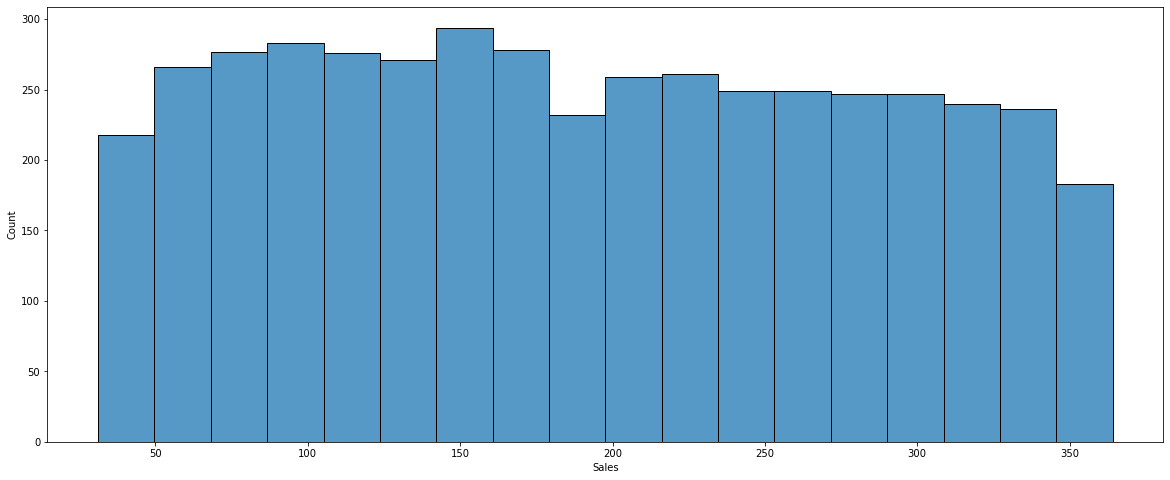

In [7]:
plt.figure(figsize=(20,8))
sns.histplot(data=data['Sales'])
plt.show()

We can observe that the Sales is somewhat equal

## Construction

Before we move on to constructing our Simple Linear Regression Model, we still need to figure out which 1 independent variable to choose from among the 3 independent variables.

To be able to choose, let us create a pairplot to visualize the relationships between pairs of variables in the data. We will use this to visually determine which variable has the strongest linear relationship with `Sales`. This will help us select the X variable for the Simple Linear Regression.

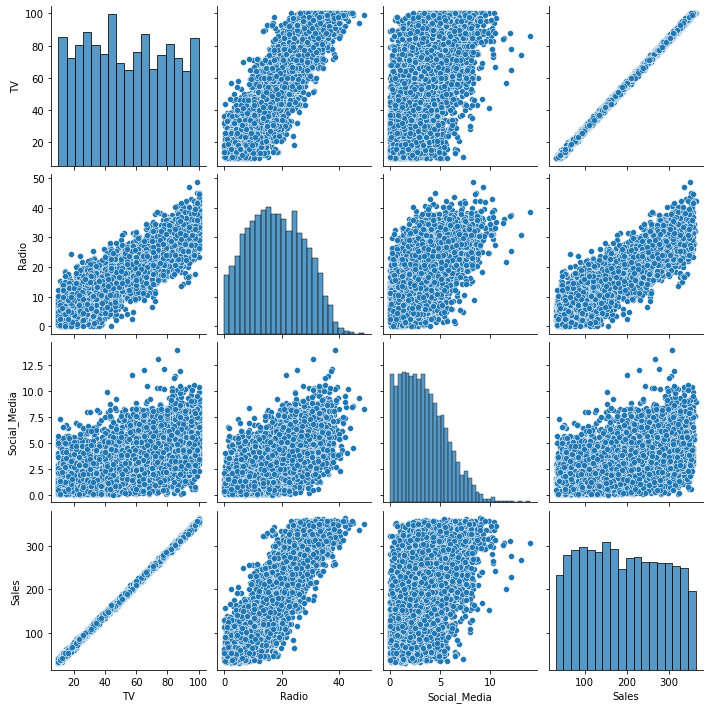

In [8]:
sns.pairplot(data)
plt.show()

Seems like we have a clear winner over here. Although `Social_Media` and `Radio` too have a linear relationship with `Sales` but `TV` has the cleanest and most relevant relationship with the `Sales`. So, we will choose `TV` as our independent variable to construct our Simple Linear Regression Model.

Replace the comment with the correct code. Use the variable you chose for `X` for building the model.

In [9]:
from statsmodels.formula.api import ols

ols_formula = "Sales ~ TV"
OLS = ols(data=data, formula=ols_formula)
model = OLS.fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:31:58   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Assumptions

### Model assumption: Linearity

The linearity assumption requires a linear relationship between the independent and dependent variables. We can simply check this assumption by creating a scatterplot comparing the independent variable with the dependent variable. 

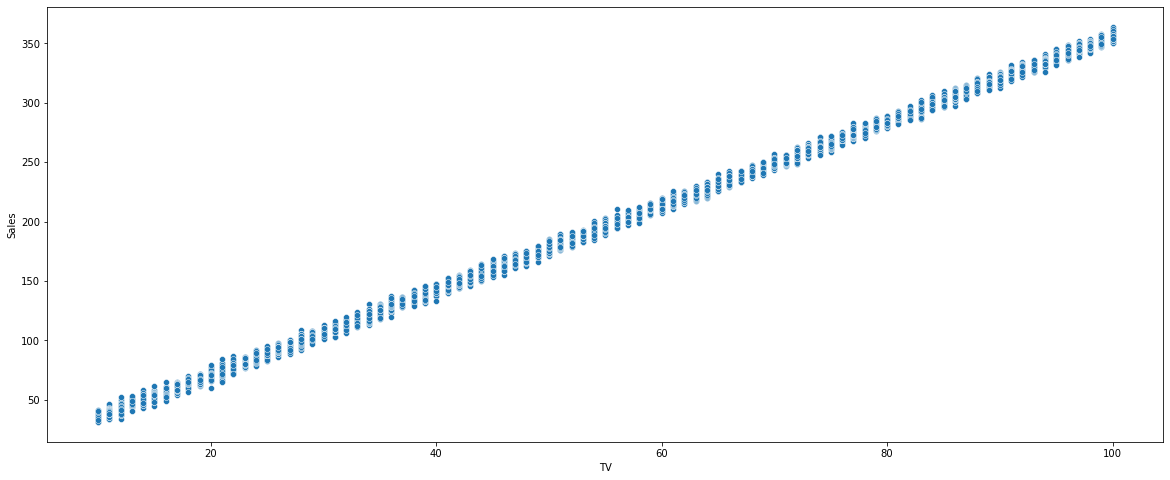

In [10]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=data, y="Sales", x="TV")
plt.show()

It is pretty evident from this scatterplot that the Linearity assumption is met.

### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

The normality assumption states that the residuals are normally distributed.

We can create two plots to check this assumption:
* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

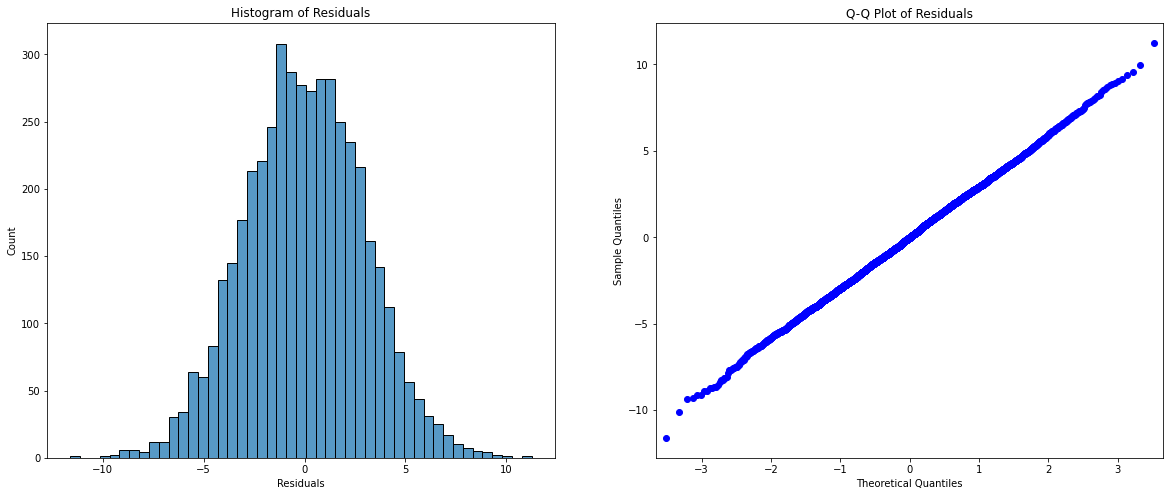

In [11]:
residuals = model.resid

fig, axis = plt.subplots(1, 2, figsize = (20,8))

sns.histplot(residuals, ax=axis[0])
axis[0].set_xlabel("Residuals")
axis[0].set_title("Histogram of Residuals")

import statsmodels.api as sm
sm.qqplot(residuals, ax=axis[1])
axis[1].set_title("Q-Q Plot of Residuals")

plt.show()

It is pretty much evident from both these graphs that the normality assumption is met.

### Model assumption: Homoscedasticity

The **homoscedasticity (constant variance) assumption** is that the residuals have a constant variance for all values of `X`.

Check that this assumption is not violated by creating a scatterplot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

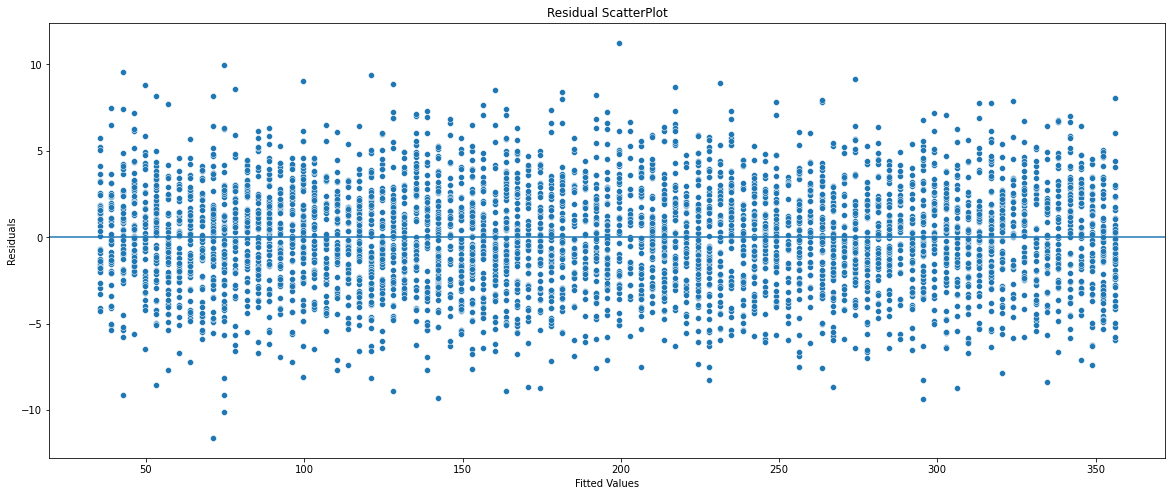

In [12]:
plt.figure(figsize=(20,8))

X = data['TV']
fitted_values = model.predict(X)

sns.scatterplot(y=residuals, x=fitted_values)
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')
plt.title('Residual ScatterPlot')

plt.axhline(y=0)
plt.show()

The graph shows that the residuals are not skewed to any one side and that they are quite uniformally distributed. So, yes the homoscedasticity assumption is met.

## Evaluation

In [13]:
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.527e+06
Date:                Mon, 18 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:31:58   Log-Likelihood:                -11393.
No. Observations:                4556   AIC:                         2.279e+04
Df Residuals:                    4554   BIC:                         2.280e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1263      0.101     -1.257      0.209      -0.323       0.071
TV             3.5614      0.002   2127.776      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.030
Skew:                           0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Uncertainity:** When `TV` is used as the independent variable, it has a p-value of $0.000$ and a $95\%$ confidence interval of $[3.558,3.565]$. This means there is a $95\%$ chance the interval $[3.558,3.565]$ contains the true parameter value of the slope. These results indicate little uncertainty in the estimation of the slope of X. Therefore, the business can be confident in the impact `TV` has on `Sales`.

**Relation:** The R-squared on the preceding output measures the proportion of variation in the dependent variable (Y) explained by the independent variable (X).
Using `TV` as X results in a simple linear regression model with $R^{2} = 0.999$. In other words, `TV` explains $99.9\%$ of the variation in `Sales`.
The R-squared value will depend on the variable selected for X. 

## Conclusion and Result

When `TV` is used as the independent variable X, the linear equation is:

$Y = \text{Intercept} + \text{Slope} * X$

$\text{Sales (in millions)} = \text{Intercept} + \text{Slope} *\text{TV (in millions)}$

$\text{Sales (in millions)} = -0.1263 + 3.5614 * \text{TV (in millions)}$

According to the model, when `TV` is used as the independent variable X, an increase of one million dollars for the TV promotional budget results in an estimated 3.5614 million dollars more in sales.